## Week 4

* Background scalar field equation

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

I want to solve: 

$\ddot{\phi} + 3H\dot{\phi} + \frac{\partial V}{\partial \phi} = 0 $

To solve this I need another equation (Baumann p.37):

$ H^2 = \frac{1}{3} \left ( \frac{1}{2}\dot{\phi}^2 + V(\phi) \right )$

N.B: 
In this case: $ V(\phi) = \frac{1}{2}m^2 \phi ^2 $



Text(0, 0.5, 'phi_dot(t)')

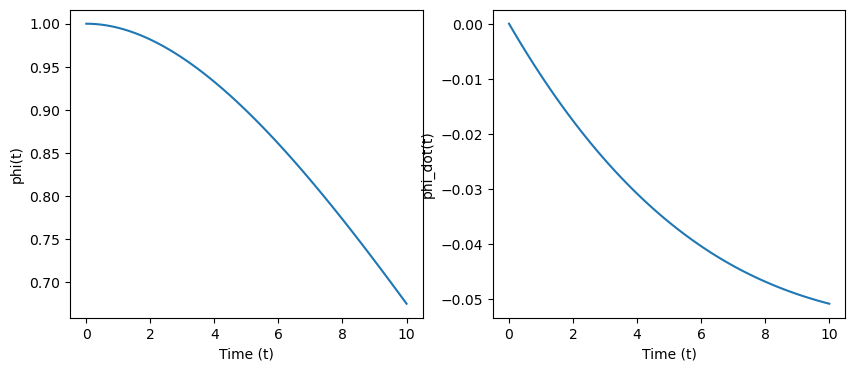

In [6]:
#Background scalar field equations
#Define the potential function
def potential(phi, m):
    return 0.5 * m**2 * phi**2

#Define the system of first-order differential equations
def system(t, z, m):
    phi, phi_dot = z
    H_squared = 1/3 * (0.5 * phi_dot**2 + potential(phi, m))
    dphi_dt = phi_dot
    dphi_dot_dt = -3 * np.sqrt(H_squared) * phi_dot - m**2 * phi
    return [dphi_dt, dphi_dot_dt]

# Parameters
m = 0.1  #maybe 1 because the equations are written in natural units, the mass of the scalar field is set to 1

#Initial conditions
phi0 = 1  # initial value of phi: 15
phi_dot0 = 0  # initial value of phi_dot: 0.1
z0 = [phi0, phi_dot0]  # [phi(0), phi_dot(0)]

#Time span
t_span = (0, 10) #defines the range of time values over which you want to solve the differential equations
t_eval = np.linspace(0, 10, 100)  #points at which to store the solution

#Solve the IVP
solution = solve_ivp(system, t_span, z0, args=(m,), t_eval=t_eval)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(solution.t, solution.y[0],label='phi(t)')
ax[1].plot(solution.t,solution.y[1], label='phi_dot(t)')
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('phi(t)')
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('phi_dot(t)')



Text(0.5, 1.0, 'Potential vs Time')

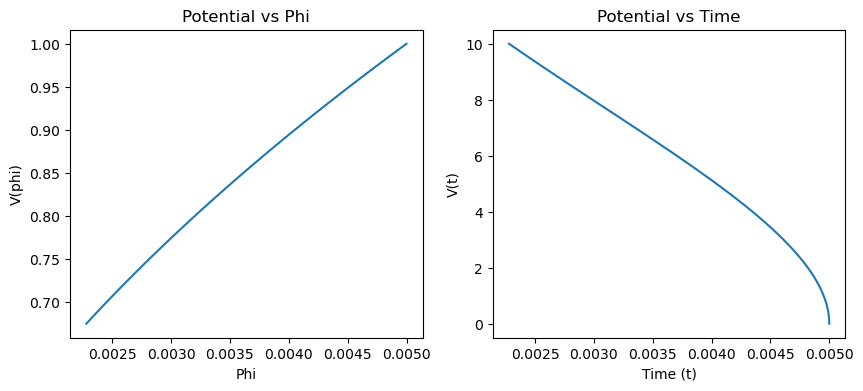

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(potential(solution.y[0],m), solution.y[0], label='V(phi)')
#ax[0].set_xlim(0,20)
#ax[0].set_ylim(0,10)
ax[1].plot(potential(solution.y[0],m), solution.t, label='V(t)')
ax[0].set_xlabel('Phi')
ax[0].set_ylabel('V(phi)')
ax[1].set_ylabel('V(t)')
ax[1].set_xlabel('Time (t)')
ax[0].set_title('Potential vs Phi')
ax[1].set_title('Potential vs Time')

Now I can plot slow roll parameters:

$ \epsilon = \frac{1}{2}M_{p}^2 \left ( \frac{V'}{V} \right )^2 $

$ \eta = M_{p}^2 \frac{V''}{V} $

where $M_{p}$ is Planck's Mass and:

$ V' = \frac{1}{2}M_{p}^2 \dot \phi ^2 $

$ V'' = \frac{1}{2}M_{p}^2 \ddot \phi^2 $


Text(0.5, 1.0, 'Eta vs Time')

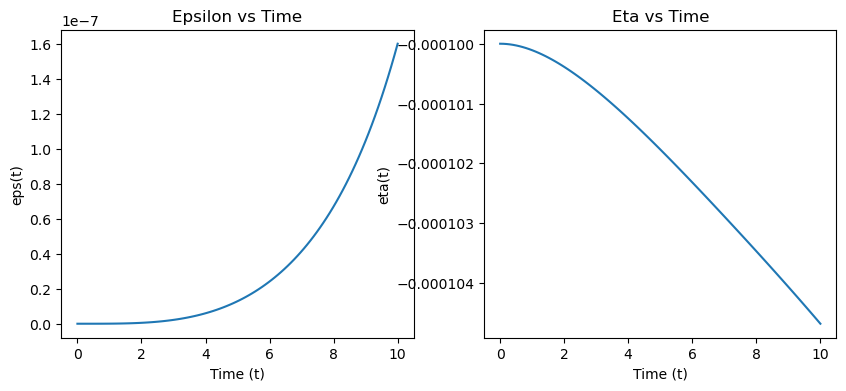

In [8]:
def potential_dot(phi_dot, m):
    return 0.5 * m**2 * phi_dot**2
def potential_dot_dot(phi_dot_dot, m):
    return 0.5 * m**2 * phi_dot_dot**2

H_squared = 1/3 * (0.5 * potential_dot(solution.y[1],m)**2 + potential(solution.y[0], m))
phi_dot_dot = -3 * np.sqrt(H_squared) * potential_dot(solution.y[1],m) - m**2 * potential(solution.y[0],m)

eps = 0.5 *m**2 * potential_dot(solution.y[1],m)**2 / potential(solution.y[0],m)**2
eta = m**2 * phi_dot_dot / potential(solution.y[0],m)

#make the plot:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(solution.t, eps,label='eps(t)')
ax[1].plot(solution.t, eta, label='eta(t)')
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('eps(t)')
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('eta(t)')
ax[0].set_title('Epsilon vs Time')
ax[1].set_title('Eta vs Time')

Text(0.5, 1.0, 'Eta_dot vs Time')

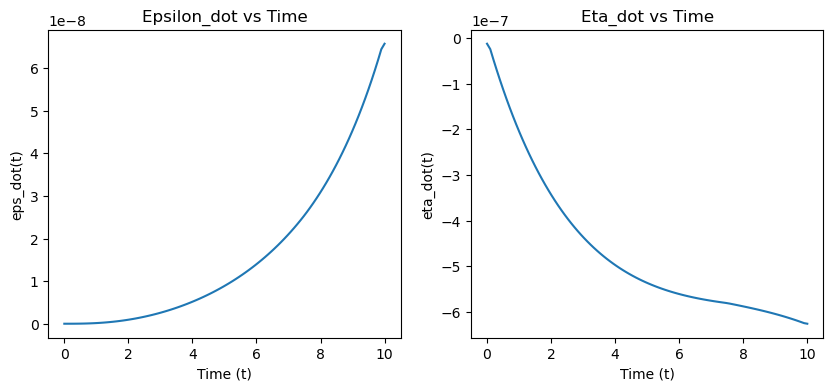

In [10]:
#To check if the slow roll parameters are small, we can plot the derivatives of the slow roll parameters
eps_dot = np.gradient(eps, solution.t)
eta_dot = np.gradient(eta, solution.t)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(solution.t, eps_dot,label='eps_dot(t)')
ax[1].plot(solution.t, eta_dot, label='eta_dot(t)')
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('eps_dot(t)')
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('eta_dot(t)')
ax[0].set_title('Epsilon_dot vs Time')
ax[1].set_title('Eta_dot vs Time')



We can see that along y the OdG is very small!! So we can say that the slow roll parameters change little.